# Exploration Exercises


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from prepare import basic_clean, tokenize, stem, lemmatize, remove_stopwords
from env import user, password, host
from wordcloud import WordCloud

## 1. Spam Data

### a. Load the spam data set.


In [2]:
#acquire data from spam_db

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
### c. Is there any overlap in the bigrams for the spam data and the ham data?


In [3]:
# df['clean'] = df['text'].apply(basic_clean).apply(tokenize).apply(remove_stopwords)
# df['stemmed'] = df['clean'].apply(stem)
# df['lemmatized'] = df['clean'].apply(lemmatize)

In [4]:
spam_words = basic_clean(' '.join(df[df.label == 'spam'].text))
ham_words = basic_clean(' '.join(df[df.label == 'ham'].text))

(-0.5, 799.5, 599.5, -0.5)

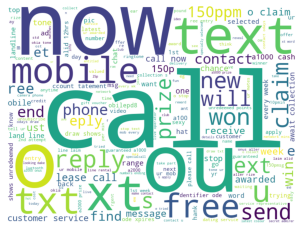

In [7]:
# spam words word cloud
img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

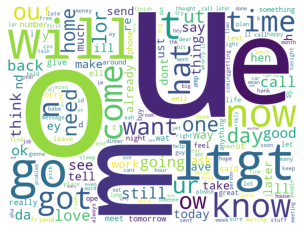

In [8]:
img = WordCloud(background_color='white', width=800, height=600).generate(ham_words)
plt.imshow(img)
plt.axis('off')

Text(0.5, 1.0, 'Top 10 most common spam bigrams')

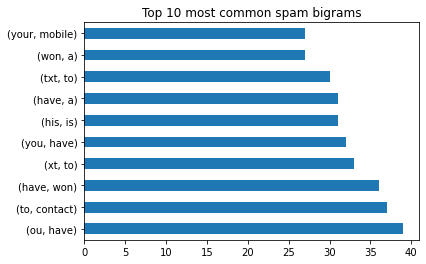

In [9]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams')


Text(0.5, 1.0, 'Top 10 most common ham bigrams')

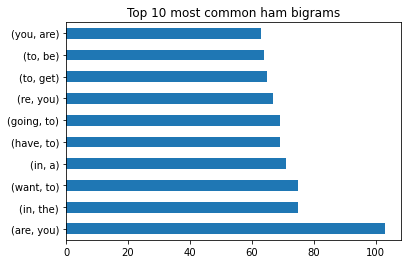

In [10]:
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham bigrams')

### d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [12]:
list(nltk.trigrams(ham_words.split()))

[('o', 'until', 'jurong'),
 ('until', 'jurong', 'point'),
 ('jurong', 'point', 'crazy'),
 ('point', 'crazy', 'vailable'),
 ('crazy', 'vailable', 'only'),
 ('vailable', 'only', 'in'),
 ('only', 'in', 'bugis'),
 ('in', 'bugis', 'n'),
 ('bugis', 'n', 'great'),
 ('n', 'great', 'world'),
 ('great', 'world', 'la'),
 ('world', 'la', 'e'),
 ('la', 'e', 'buffet'),
 ('e', 'buffet', 'ine'),
 ('buffet', 'ine', 'there'),
 ('ine', 'there', 'got'),
 ('there', 'got', 'amore'),
 ('got', 'amore', 'wat'),
 ('amore', 'wat', 'k'),
 ('wat', 'k', 'lar'),
 ('k', 'lar', 'oking'),
 ('lar', 'oking', 'wif'),
 ('oking', 'wif', 'u'),
 ('wif', 'u', 'oni'),
 ('u', 'oni', 'dun'),
 ('oni', 'dun', 'say'),
 ('dun', 'say', 'so'),
 ('say', 'so', 'early'),
 ('so', 'early', 'hor'),
 ('early', 'hor', 'c'),
 ('hor', 'c', 'already'),
 ('c', 'already', 'then'),
 ('already', 'then', 'say'),
 ('then', 'say', 'ah'),
 ('say', 'ah', "don't"),
 ('ah', "don't", 'think'),
 ("don't", 'think', 'he'),
 ('think', 'he', 'goes'),
 ('he', 'goe

In [13]:
list(nltk.trigrams(spam_words.split()))

[('ree', 'entry', 'in'),
 ('entry', 'in', '2'),
 ('in', '2', 'a'),
 ('2', 'a', 'wkly'),
 ('a', 'wkly', 'comp'),
 ('wkly', 'comp', 'to'),
 ('comp', 'to', 'win'),
 ('to', 'win', 'up'),
 ('win', 'up', 'final'),
 ('up', 'final', 'tkts'),
 ('final', 'tkts', '21st'),
 ('tkts', '21st', 'ay'),
 ('21st', 'ay', '2005'),
 ('ay', '2005', 'ext'),
 ('2005', 'ext', 'to'),
 ('ext', 'to', '87121'),
 ('to', '87121', 'to'),
 ('87121', 'to', 'receive'),
 ('to', 'receive', 'entry'),
 ('receive', 'entry', 'questionstd'),
 ('entry', 'questionstd', 'txt'),
 ('questionstd', 'txt', "rate's"),
 ('txt', "rate's", 'apply'),
 ("rate's", 'apply', "08452810075over18's"),
 ('apply', "08452810075over18's", 'reesg'),
 ("08452810075over18's", 'reesg', 'ey'),
 ('reesg', 'ey', 'there'),
 ('ey', 'there', 'darling'),
 ('there', 'darling', "it's"),
 ('darling', "it's", 'been'),
 ("it's", 'been', '3'),
 ('been', '3', "week's"),
 ('3', "week's", 'now'),
 ("week's", 'now', 'and'),
 ('now', 'and', 'no'),
 ('and', 'no', 'word'),
 

## 2. Explore the blog articles using the techniques discussed in the exploration lesson.



## 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.